### Student Information
Name: Ko Lih Han

Student ID: 112065710

GitHub ID: kolihhan

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [1]:
### Begin Assignment Here
%load_ext autoreload
%autoreload 2

### First Part

In [50]:
from sklearn.datasets import fetch_20newsgroups
import seaborn as sns
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import helpers.data_mining_helpers as dmh
import math
from sklearn.manifold import TSNE
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.feature_extraction.text import CountVectorizer

from matplotlib import pyplot as plt

In [2]:
#Get Data from Lab 1 Master
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 


X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))


count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# sort term frequencies with the feature names
paired_values = list(zip(count_vect.get_feature_names_out(), term_frequencies))
sorted_paired_values = sorted(paired_values, key=lambda x: x[1], reverse=True)

term_frequencies_log = [math.log(i) for i in term_frequencies]

terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)


import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)


import pandas as pd

from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile=r'helpers\td_freq_db_sci_med.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile=r'helpers\td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_alt_atheism))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile=r'helpers\td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj4 = alg.FPGrowth(iFile=r'helpers\td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_soc_religion_christian))) #print the total number of patterns
print('Runtime: ' + str(obj4.getRuntime())) #measure the runtime

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")



# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)



<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 73 stored elements and shape (1, 35788)>
  Coords	Values
  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 10000
Runtime: 0.42551159858703613
Freq

##### >>> **Exercise 2 (take home)** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [3]:
# Exercise 2
# Experiment with other querying techniques using pandas dataframes. 
# Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 


#Answer here

# Return top X result
X.head(10)

# Return bottom X result
X.tail(10)

# Return a specific number of rows/columns to return, or a fraction of rows.
X.sample(n = 1)
# X.sample(frac= 0.5)

# Boolean Indexing
X[X['category'] > 0]

#Indexing with isin

X['category'].isin([1, 2])[:5]

# X[X['category'].isin([1, 2])]

# Where Method and Masking
# Selecting values from a Series with a boolean vector generally returns a subset of the data.
# To guarantee that selection output has the same shape as the original data, you can use the where method in Series and DataFrame.

X.where(X['category'] > 2)[:10]

# The query() Method
# DataFrame objects have a query() method that allows selection using an expression.

X.query('(category > 2) & (category_name == "soc.religion.christian")')



,text,category,category_name,unigrams,tokenized_text
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","{privacy., it, they, >number, some, someone, h..."
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","{anyone, education, Faculteit, of, paper, Rijk..."
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","{it, of, Christ's, Like, man,, then, many, cer..."
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","{objections, it, they, Applied, conviction, of..."
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","{Please,, it, they, feelings, actions,, of, wi..."
...,...,...,...,...,...
2229,From: jcj@tellabs.com (jcj) Subject: Re: proof...,3,soc.religion.christian,"[From, :, jcj, @, tellabs.com, (, jcj, ), Subj...","{whether, smayo@world.std.com, some, of, broth..."
2230,From: news@cbnewsk.att.com Subject: Re: Bible ...,3,soc.religion.christian,"[From, :, news, @, cbnewsk.att.com, Subject, :...","{AT&T, are, True., warns, 2, Also, Subject:, s..."
2246,From: lmvec@westminster.ac.uk (William Hargrea...,3,soc.religion.christian,"[From, :, lmvec, @, westminster.ac.uk, (, Will...","{of, thank, with, alot, everyone, |, Universit..."
2247,From: daniels@math.ufl.edu (TV's Big Dealer) S...,3,soc.religion.christian,"[From, :, daniels, @, math.ufl.edu, (, TV, 's,...","{no, ""Acts""., readings., Codex, Text, Dealer),..."


##### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [4]:
# Exercise 5

import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [5]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [6]:
# Answer here
# Isnull function checks whether the column is null / NaN or not.
# But value such as 'NaN' , 'None' , '' are detected as string which is not null/NaN.
# Replace it with the correct value
NA_df['missing_example'].replace({'NaN': None, 'None': None, '': None}, inplace=True)

NA_df['missing_example'].isnull()

C:\Users\lihha\AppData\Local\Temp\ipykernel_36188\1705430471.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  NA_df['missing_example'].replace({'NaN': None, 'None': None, '': None}, inplace=True)


0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

##### >>> **Exercise 6 (take home)**
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [7]:
X_sample = X.sample(n=1000, random_state=42) #random state
X_sample[0:4]
# Answer here
# 1. The value of X_sample will always be different without setting a random state number.
# 2. The order of the row has been shuffle because its random sampling.

,text,category,category_name,unigrams,tokenized_text
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med,"[From, :, ray, @, engr.LaTech.edu, (, Bill, Ra...","{would, it, think, they, happened., in, Fibrom..."
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian,"[From, :, jkellett, @, netcom.com, (, Joe, Kel...","{lot, Kellett), abstinence-education, of, simp..."
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med,"[From, :, noring, @, netcom.com, (, Jon, Norin...","{whether, body's, it, some, etc.),, But, I'll,..."
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian,"[From, :, fraseraj, @, dcs.glasgow.ac.uk, (, A...","{whether, it, they, Fraser), conflict., of, wi..."


##### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 



![alt txt](https://i.imgur.com/9eO431H.png)

                          X  X_sample
category_name                        
alt.atheism             480       206
comp.graphics           584       247
sci.med                 594       277
soc.religion.christian  599       270
                          X  X_sample
category_name                        
soc.religion.christian  599       270
sci.med                 594       277
comp.graphics           584       247
alt.atheism             480       206


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

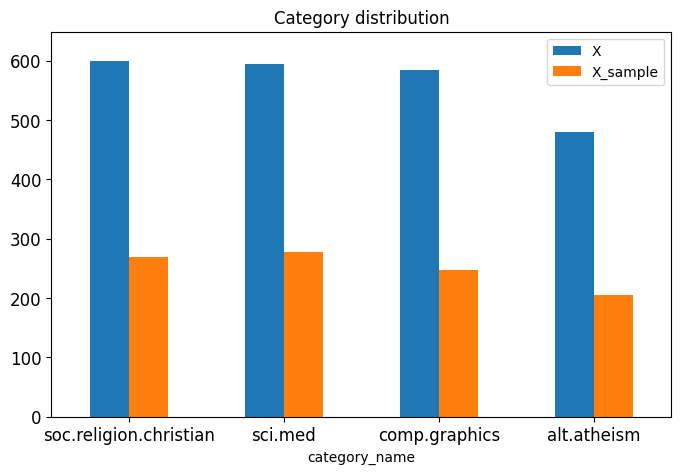

In [8]:
# Answer here



barChart = pd.DataFrame({'X': X.category_name.value_counts(), 'X_sample': X_sample.category_name.value_counts()})
print(barChart)

barChart = barChart.sort_values(by='X', ascending=False)
print(barChart)

upper_bound = max(X.category_name.value_counts() + 50)

plt.style.use('default')

# plot barchart for X_sample
barChart.plot(kind = 'bar',
              title = 'Category distribution',
              ylim = [0, upper_bound], 
              rot = 0, fontsize = 12, figsize = (8,5))



##### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [9]:
# Answer here
test = X_counts[0:5, 0:100].toarray()

for index,count in enumerate(test[4]):
    if count > 0:
        print('Terms', count_vect.get_feature_names_out()[index])
        


Terms 00
Terms 01


##### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

[0 0 0 ... 0 0 0]
[32493 32142 32270 35638 23610 32233  4992  6298 23250 18551 32139 35157
  5698 35648 17268 14601 17556 21322  5410 12014 34660 13400 35057 12051
 21209  9191  7766 23870 24784  7056]
['to' 'the' 'this' 'you' 'of' 'they' 'and' 'be' 'not' 'it' 'that' 'with'
 'at' 'your' 'if' 'for' 'in' 'me' 'are' 'do' 'want' 'etc' 'will' 'does'
 'may' 'company' 'can' 'or' 'people' 'boss']


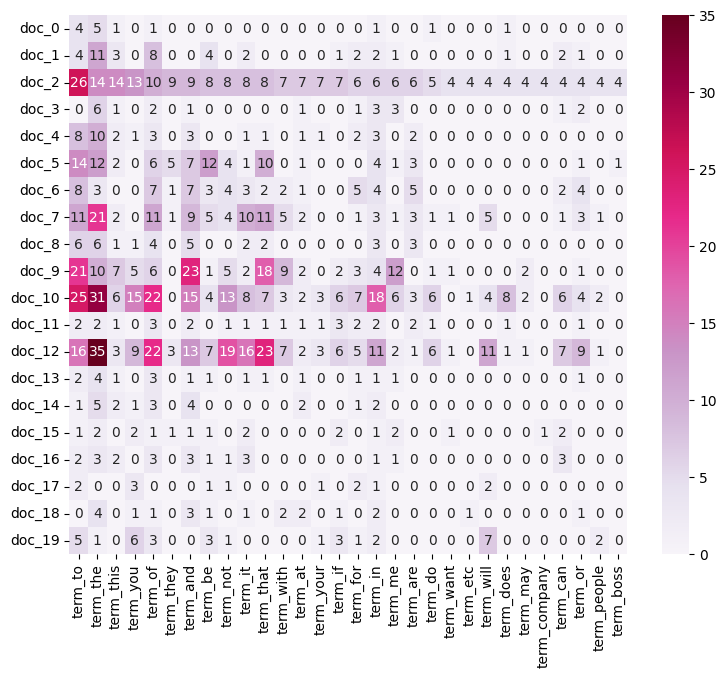

In [10]:
# Answer here

# Sort term freq value in docs, example doc3 and get top 30 
doc1 = X_counts[2].toarray().flatten()

print(doc1)

top_terms = np.argsort(doc1)[::-1][:30]

print(top_terms)
print(count_vect.get_feature_names_out()[top_terms])

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[top_terms]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, top_terms].toarray() #X_counts[how many documents, how many terms]


df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=np.max(plot_z), annot=True)

##### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [11]:
# Answer here
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])])

fig.show()


#### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [12]:
# Answer here

# Theres too much vocab with 0, So i want to set a threshold to filter and reduce the number of terms
# For example i want to see vocab with >= 1000 freq
# Get index for vocab
filter_freq = [index for index, count in enumerate(term_frequencies) if count >= 1000]

fig = go.Figure([go.Bar(x=count_vect.get_feature_names_out()[filter_freq] , y = term_frequencies[filter_freq])])

fig.show()


#### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [13]:
# Answer here
filter_freq = [index for index, count in enumerate(term_frequencies) if count >= 1000]

filter_freq = sorted(filter_freq, key=lambda x: term_frequencies[x], reverse=True)
fig = go.Figure([go.Bar(x=count_vect.get_feature_names_out()[filter_freq] , y = term_frequencies[filter_freq])])

fig.show()

#### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [14]:
# Answer here
# Since we use log, the count should not >= 1000

filter_freq = [index for index, count in enumerate(term_frequencies) if count >= math.log(1000)]
filter_freq = sorted(filter_freq, key=lambda x: term_frequencies[x], reverse=True)
filtered_frequencies = [term_frequencies_log[i] for i in filter_freq]

fig = go.Figure([go.Bar(x=count_vect.get_feature_names_out()[filter_freq] , y = filtered_frequencies )])

fig.show()

# From the chart below we can see that the chart will show a more balanced distribution of term counts
# This helps in identifying important terms that may not have visualize when using raw count

# The possible insight i think that is reducing noise in the data and discovering important but less frequent words

#### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [15]:
# Answer here

# As we can see the chart above the top 5% words are usually stop words
# But the Bottom 1% words are very specific terms that use in specific domains.

#### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance.

In [16]:
# Answer Here
from PAMI.frequentPattern.topk import FAE 
from PAMI.frequentPattern.maximal import MaxFPGrowth


k = [500, 1000, 1500]
thresholds = [3, 6, 9]

for i in k:
    miner = FAE.FAE(iFile=r'helpers/td_freq_db_comp_graphics.csv', k=i)
    miner.mine()
    print('{}, Runtime = {}'.format(i, miner.getRuntime()))


for i in thresholds:
    miner2 = MaxFPGrowth.MaxFPGrowth(iFile=r'helpers/td_freq_db_comp_graphics.csv', minSup=i)
    miner2.mine()
    print('{}, Runtime = {}'.format(i, miner.getRuntime()))



 TopK frequent patterns were successfully generated using FAE algorithm.
500, Runtime = 0.9061429500579834
 TopK frequent patterns were successfully generated using FAE algorithm.
1000, Runtime = 1.684208869934082
 TopK frequent patterns were successfully generated using FAE algorithm.
1500, Runtime = 3.5040524005889893
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
3, Runtime = 3.5040524005889893
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
6, Runtime = 3.5040524005889893
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
9, Runtime = 3.5040524005889893


In [17]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile=r'helpers/td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

frequentPatternsDF_comp_graphics

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 33574
Runtime: 0.0848228931427002


,Patterns,Support
0,individual,9
1,certain,9
2,hall,9
3,mike,9
4,vr,9
...,...,...
33569,life,24
33570,ideas,24
33571,feel,24
33572,tried,24


In [18]:
miner.getPatternsAsDataFrame()

,Patterns,Support
0,maybe,26
1,life,24
2,ideas,24
3,feel,24
4,tried,24
...,...,...
1495,awful discussing favor proposed learn personal...,12
1496,discussing favor proposed learn personally fee...,12
1497,convenience discussing favor proposed learn pe...,12
1498,discussing favor proposed learn personally fee...,12


In [19]:
miner2.getPatternsAsDataFrame()

# We can see that all algorithms have the same support for words like maybe, life ideas...etc
# The size of the three are different, like FPGrowth has 33000+ rows with low support

,Patterns,Support
0,tim,9
1,option,9
2,rumours 68070,9
3,chip,9
4,rumours mcmains unt,9
...,...,...
655,wrong,23
656,tried,24
657,ideas,24
658,life,24


#### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

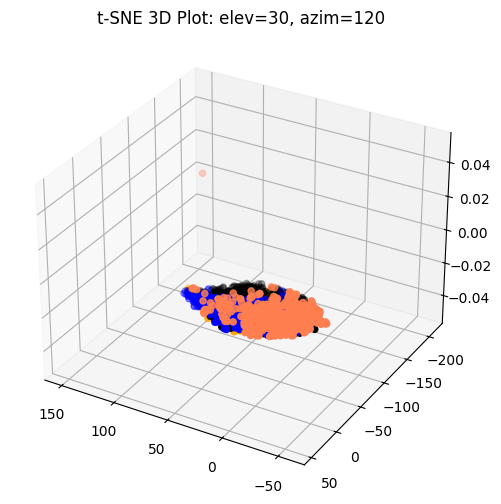

In [20]:
# Answer here
ThreeDX_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)

col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig = plt.figure(figsize=(8, 6))
def plot_3d(X_graph, title, elev=30, azim=120):
    ax = fig.add_subplot(111, projection='3d')
    
    for c, category in zip(col, categories):
        xs = X_graph[X['category_name'] == category].T[0]
        ys = X_graph[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)

    ax.view_init(elev=elev, azim=azim)
    ax.set_title(title)
    plt.show()

angles = [(30, 120), (60, 120), (30, 210)]

for elev, azim in angles:
    plot_3d(ThreeDX_tsne_aug, f't-SNE 3D Plot: elev={elev}, azim={azim}', elev, azim)
        
        
# Reviewing the chart below, i do think that theres no diff with chart 2D


#### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [21]:
# Answer here
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X

,text,category,category_name,unigrams,tokenized_text,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","{of, (Programmer), email, University, images, ...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","{human,, it, done,, some, of, Of, patch, divin...","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","{privacy., it, they, >number, some, someone, h...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","{anyone, education, Faculteit, of, paper, Rijk...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","{it, of, Christ's, Like, man,, then, many, cer...","[0, 0, 0, 1]"
...,...,...,...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med,"[From, :, roos, @, Operoni.Helsinki.FI, (, Chr...","{would, X-400:, 0, appreciate, find, am, c.), ...","[0, 0, 1, 0]"
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med,"[From, :, mhollowa, @, ic.sunysb.edu, (, Micha...","{notice., it, review, some, fast., thank, Star...","[0, 0, 1, 0]"
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med,"[From, :, sasghm, @, theseus.unx.sas.com, (, G...","{applied, folklore, it, they, some, But, burro...","[0, 0, 1, 0]"
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med,"[From, :, Dan, Wallach, <, dwallach, @, cs.ber...","{it, requested., Supersedes:, area., many, Adv...","[0, 0, 1, 0]"


### Second Part

In [67]:
import pandas as pd

# The Data
# Load new dataset
X = pd.read_csv("Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
X

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,....."
1496,not nostalgia,it's sad this is such a beautiful song when yo...
1497,not nostalgia,"Dear Friend, I think age and time is not that ..."
1498,nostalgia,I was born in 1954 and started to be aware of ...


In [68]:
# Data Preparation
# Data Transformation
import helpers.data_mining_helpers as dmh

# columns are sentiment,comment
# nostalgia : 1
# not nostalgia	: 0
X['sentiment_label'] = X.sentiment.apply(lambda x: int(x == 'nostalgia'))
X


,sentiment,comment,sentiment_label
0,not nostalgia,He was a singer with a golden voice that I lov...,0
1,nostalgia,The mist beautiful voice ever I listened to hi...,1
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0
4,nostalgia,listening to his songs reminds me of my mum wh...,1
...,...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,.....",0
1496,not nostalgia,it's sad this is such a beautiful song when yo...,0
1497,not nostalgia,"Dear Friend, I think age and time is not that ...",0
1498,nostalgia,I was born in 1954 and started to be aware of ...,1


In [7]:
# Data Mining using Pandas
X.isnull().apply(lambda x: dmh.check_missing_values(x))



,sentiment,comment,sentiment_label
0,The amount of missing records is:,The amount of missing records is:,The amount of missing records is:
1,0,0,0


In [14]:
# Dealing with duplicates
print(sum(X.duplicated())) # Found 1 duplicated

X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

print(sum(X.duplicated()))

1
0


In [28]:
# Data Preprocessing
X_sample = X.sample(n=1000) #random state

X_sample

,sentiment,comment
1355,not nostalgia,I ran into this video a couple weeks ago. I'm ...
867,not nostalgia,People who can not enjoy the music without dis...
1296,not nostalgia,Where can I find these kind of innocent love s...
889,nostalgia,"I used to have a 70s CD box as a kid, I listen..."
207,not nostalgia,"We will ""NEVER"" forget you Elvis. This so..."
...,...,...
529,not nostalgia,I wish I could have met this handsome man.. He...
395,nostalgia,Long-time ago. My dad: This song is about a gu...
27,nostalgia,Brings back memories of listening to Jim Reeve...
246,not nostalgia,Beautiful song .. has the late '50s/early '60s...


sentiment
nostalgia        750
not nostalgia    748
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

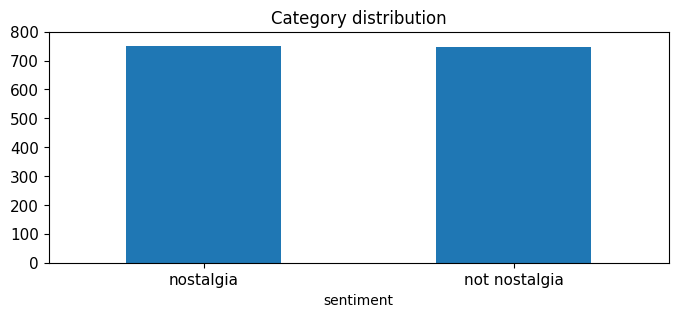

In [29]:
print(X.sentiment.value_counts())

upper_bound = max(X.sentiment.value_counts() + 50)

# plot barchart for X
X.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

sentiment
nostalgia        503
not nostalgia    497
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

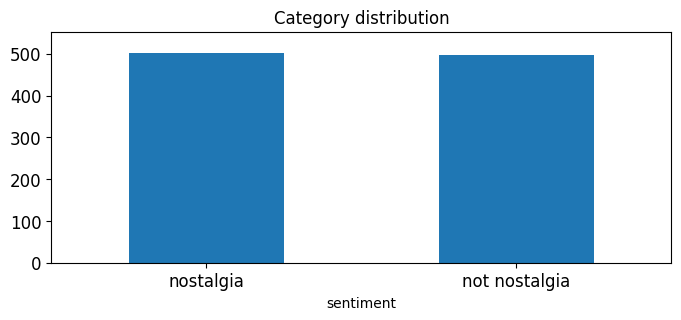

In [30]:
print(X_sample.sentiment.value_counts())

upper_bound = max(X_sample.sentiment.value_counts() + 50)

# plot barchart for X_sample
X_sample.sentiment.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

                 X  X_sample
sentiment                   
nostalgia      750       503
not nostalgia  748       497
                 X  X_sample
sentiment                   
nostalgia      750       503
not nostalgia  748       497


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

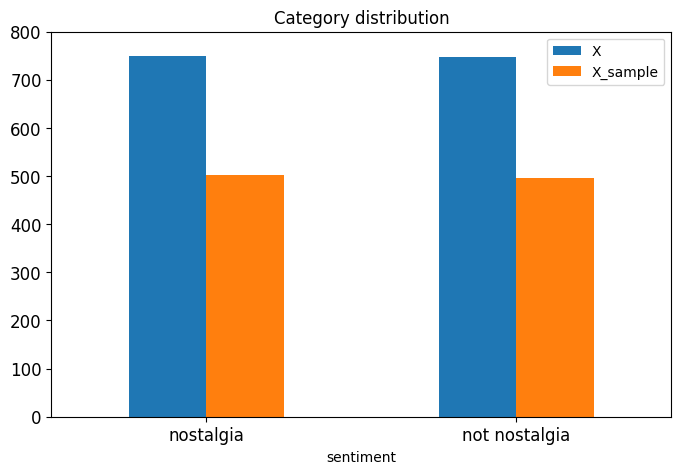

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

barChart = pd.DataFrame({'X': X.sentiment.value_counts(), 'X_sample': X_sample.sentiment.value_counts()})
print(barChart)

barChart = barChart.sort_values(by='X', ascending=False)
print(barChart)

upper_bound = max(X.sentiment.value_counts() + 50)

plt.style.use('default')

# plot barchart for X_sample
barChart.plot(kind = 'bar',
              title = 'Category distribution',
              ylim = [0, upper_bound], 
              rot = 0, fontsize = 12, figsize = (8,5))



In [34]:
# Feature Creation
import nltk
nltk.download('punkt_tab')


X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))
X[0:4]["unigrams"]

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lihha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [36]:
# Feature subset selection
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix
print(X_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 45 stored elements and shape (1, 3730)>
  Coords	Values
  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [42]:
analyze = count_vect.build_analyzer()
analyze(X.comment[0])



['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [48]:
count_vect.get_feature_names_out()[100]

'3rd'

[0 0 0 ... 0 0 0]
[3336  258 3025 3468 1969 2444 1546 1429 3570 3211 2219 2302 1989 3622
 3020 2341 3650   16 2028 3534 1936 3284 2234 2035 2287 2555 2254 2671
 3045 3296]
['to' 'and' 'so' 'up' 'like' 'people' 'had' 'gentle' 'was' 'sweet' 'most'
 'no' 'little' 'who' 'smooth' 'of' 'with' '17' 'love' 'voice' 'leave'
 'the' 'mr' 'loving' 'never' 'pretensions' 'my' 'reeves' 'songs' 'think']


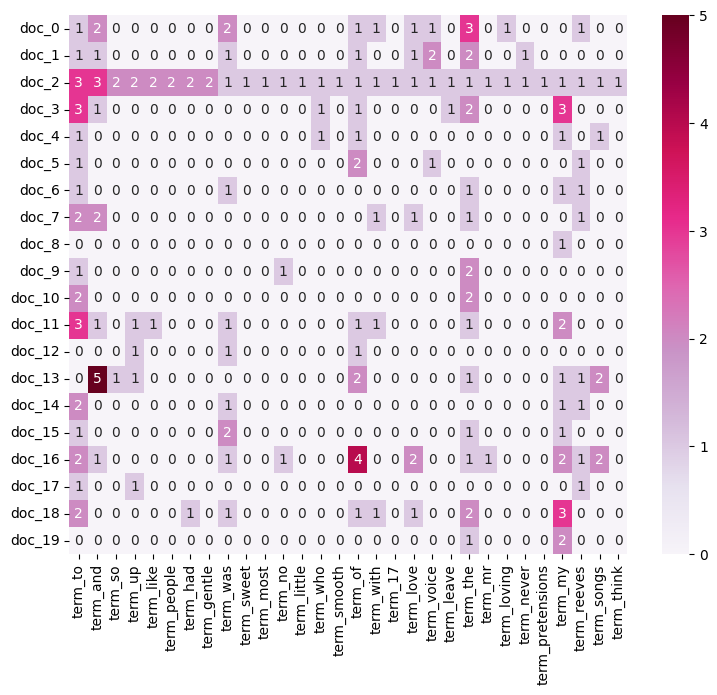

In [51]:
# Heat map

# Sort term freq value in docs, example doc3 and get top 30 
doc1 = X_counts[2].toarray().flatten()

print(doc1)

top_terms = np.argsort(doc1)[::-1][:30]

print(top_terms)
print(count_vect.get_feature_names_out()[top_terms])

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[top_terms]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, top_terms].toarray() #X_counts[how many documents, how many terms]


df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=np.max(plot_z), annot=True)

In [64]:
# Attribute Transformation / Aggregation
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
    
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0] #sum of first term: 00
#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

np.int64(1)

In [65]:
import plotly.graph_objects as go
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

filter_freq = [index for index, count in enumerate(term_frequencies) if count >= math.log(1000)]
filter_freq = sorted(filter_freq, key=lambda x: term_frequencies[x], reverse=True)
filtered_frequencies = [term_frequencies_log[i] for i in filter_freq]

fig = go.Figure([go.Bar(x=count_vect.get_feature_names_out()[filter_freq] , y = filtered_frequencies )])

fig.show()

In [78]:
# Finding frequent patterns
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['sentiment_label'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['sentiment_label'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the comment data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [72]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=1 #You can change it from 0 to 1
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category 1:


,07,10,11,11th,12,13,14,15,16,17,...,young,younger,youngster,your,yours,youth,youthful,youtube,yrs,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


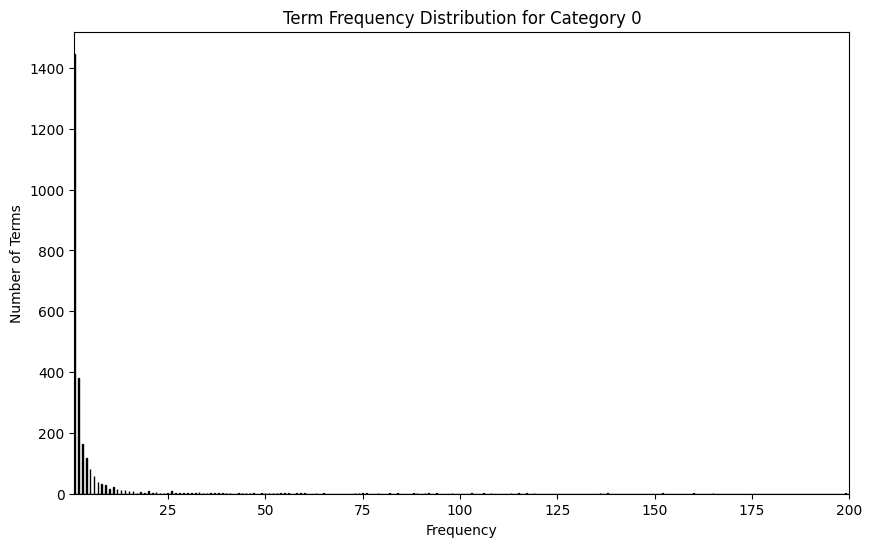

In [73]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [ ]:
category_number=1 #You can change it from 0 to 1

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
filt_test_term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    filt_test_term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_test_term_document_dfs[categories[category_number]]


In [81]:
from PAMI.extras.DF2DB import DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for category in filt_test_term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(filt_test_term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category}.csv', '>=', 1)


In [ ]:
from PAMI.extras.dbStats import TransactionalDatabase as tds

csv_url = "td_freq_db_0.csv" #You can change it from 0 to 1

obj = tds.TransactionalDatabase(csv_url)
obj.run()
obj.printStats()
obj.plotGraphs()

In [83]:
# PAMI FAE, MaxFPGrowth
from PAMI.frequentPattern.topk import FAE 
from PAMI.frequentPattern.maximal import MaxFPGrowth


k = [500]
thresholds = [3]

for i in k:
    miner = FAE.FAE(iFile='td_freq_db_0.csv', k=i)
    miner.mine()
    print('{}, Runtime = {}'.format(i, miner.getRuntime()))


for i in thresholds:
    miner2 = MaxFPGrowth.MaxFPGrowth(iFile='td_freq_db_0.csv', minSup=i)
    miner2.mine()
    print('{}, Runtime = {}'.format(i, miner.getRuntime()))



 TopK frequent patterns were successfully generated using FAE algorithm.
500, Runtime = 0.2611362934112549
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
3, Runtime = 0.2611362934112549


In [90]:
frequentPatternsDF_0 = miner.getPatternsAsDataFrame()
frequentPatternsDF_0

,Patterns,Support
0,the,405
1,this,355
2,and,311
3,to,277
4,of,260
...,...,...
495,you have,33
496,was he,33
497,in is that,32
498,is have,32


In [91]:
frequentPatternsDF_1 = miner2.getPatternsAsDataFrame()
frequentPatternsDF_1

,Patterns,Support
0,is thinks,3
1,this months,3
2,and to my currently,3
3,of in kids,3
4,the and wait,3
...,...,...
25107,the this and of song is in it,3
25108,this and to of song is it,3
25109,the and to of song is it,3
25110,the this to of song is it,3


In [92]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_0, frequentPatternsDF_1]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")


                        Patterns  Support
0                            the      405
1                           this      355
2                            and      311
3                             to      277
4                             of      260
...                          ...      ...
868                 of although         3
869          this is just track         3
870        this is in but track         3
871        so voice clear karen         3
22410  this to is in it have be         3

[25612 rows x 2 columns]
Number of patterns discarded: 0


In [93]:

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,in later,the later,the in for 1st,the in that 1st,the of is in 1st,of although,this is just track,this is in but track,so voice clear karen,this to is in it have be
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
# Dimensionality Reduction

#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

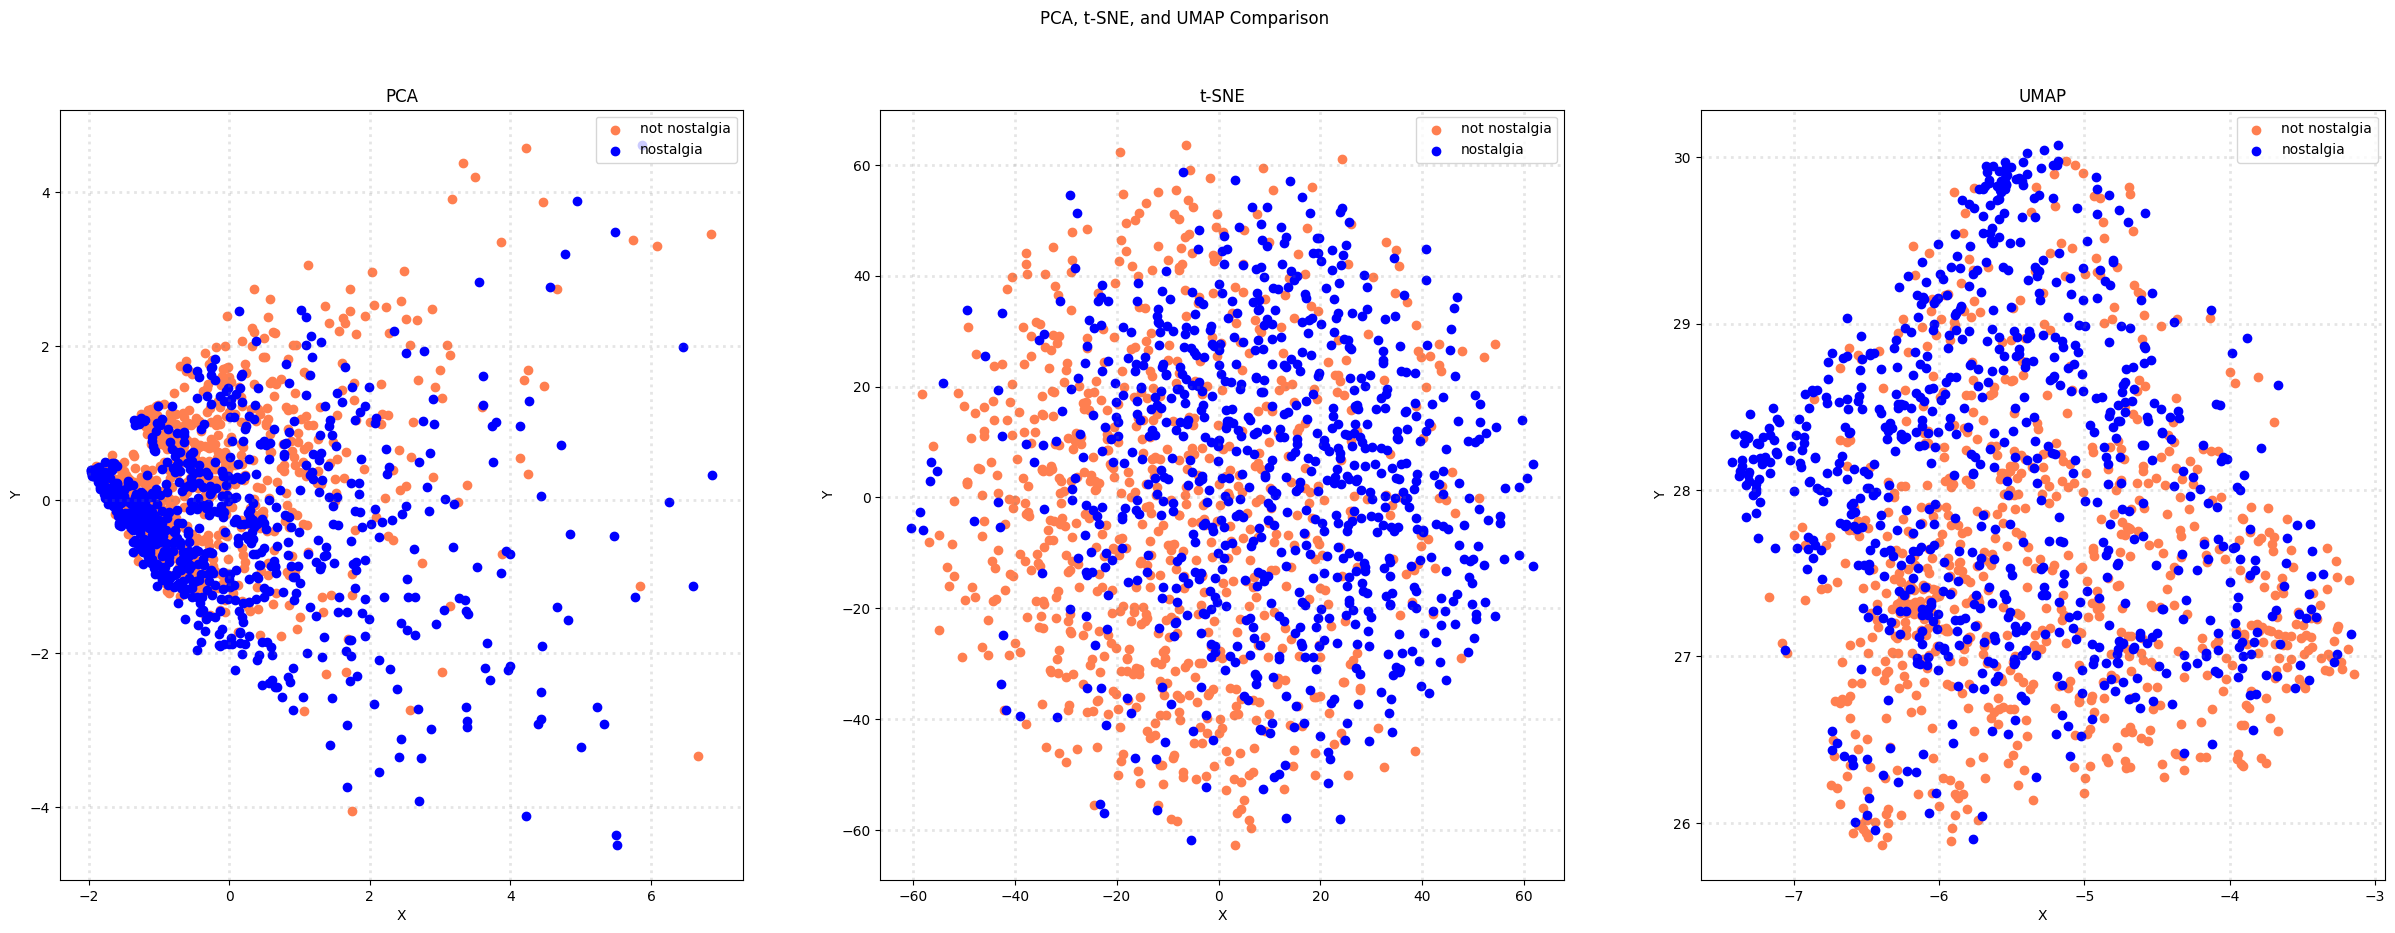

In [96]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

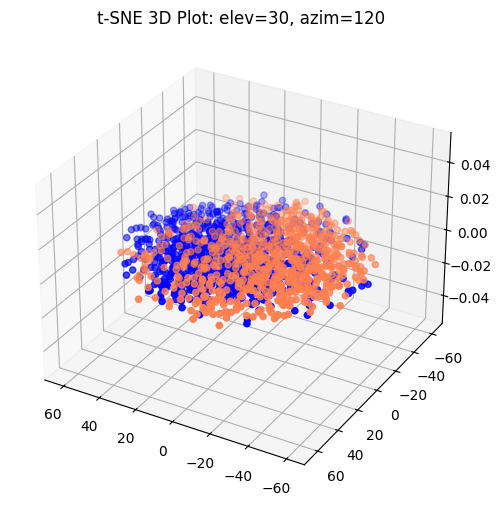

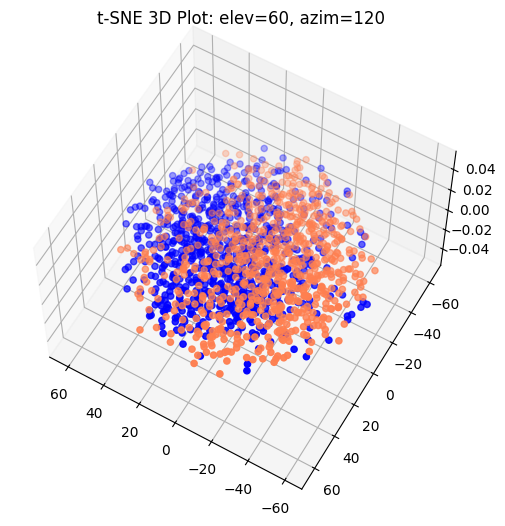

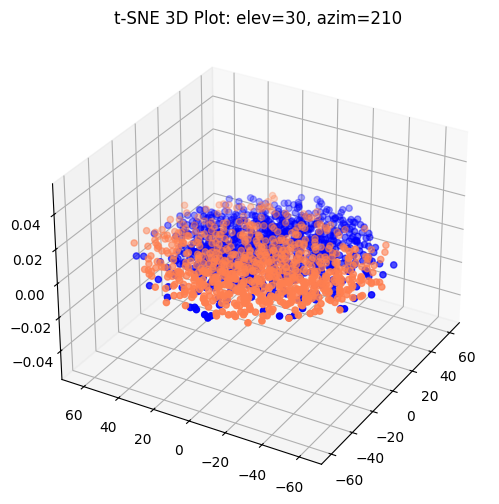

In [106]:


def plot_3d(X_graph, title, elev=30, azim=120):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    for c, category in zip(col, categories):
        xs = X_graph[X['sentiment'] == category].T[0]
        ys = X_graph[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)

    ax.view_init(elev=elev, azim=azim)
    ax.set_title(title)
    plt.show()

angles = [(30, 120), (60, 120), (30, 210)]

for elev, azim in angles:
    plot_3d(X_tsne_tdm, f't-SNE 3D Plot: elev={elev}, azim={azim}', elev, azim)
        

In [108]:
# Discretization and Binarization
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

mlb.fit(X.sentiment)
X['bin_category'] = mlb.transform(X['sentiment']).tolist()
X

,sentiment,comment,sentiment_label,tokenized_text,bin_category
0,not nostalgia,He was a singer with a golden voice that I lov...,0,"{you, the, I, at, He, great, You, vouch, all, ...",[1]
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,"{listened, I, beautiful, ever, singing, The, N...",[0]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,"{17., Jesus, like, the, I, sweet,, at, great, ...",[0]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0,"{you, This, Lou, I, 2nd, the, Lou., tour, ""mar...",[1]
4,nostalgia,listening to his songs reminds me of my mum wh...,1,"{my, reminds, me, mum, his, to, played, who, h...",[0]
...,...,...,...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,.....",0,"{thing, the, speaks, suggest, well!...or, open...",[1]
1496,not nostalgia,it's sad this is such a beautiful song when yo...,0,"{you, really, such, beautiful, it's, sad, and,...",[1]
1497,not nostalgia,"Dear Friend, I think age and time is not that ...",0,"{not, comes, you, like, music., I, time, it, a...",[1]
1498,nostalgia,I was born in 1954 and started to be aware of ...,1,"{today, sound,, started, others, This, at, I, ...",[0]


In [109]:
# Data Exploration

# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)



In [110]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['My grandma really loved elvis ???s music .. so we played this song at her funeral .. everytime i listen to this Song there are so many memories in my head']
["My grandad listens this on a CD with me and I learned the words but sadly he passed away and we will miss and love him I lost him when I'm 11 I will always miss him:("]


In [111]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [112]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.124611
Cosine Similarity using count bw 1 and 3: 0.170251
Cosine Similarity using count bw 2 and 3: 0.121988
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\lihha\AppData\Local\Temp\ipykernel_6628\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\lihha\AppData\Local\Temp\ipykernel_6628\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\lihha\AppData\Local\Temp\ipykernel_6628\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\lihha\AppData\Local\Temp\ipykernel_6628\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scal

In [123]:
# 7. Data Classification

#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['sentiment', 'sentiment_label']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment_label'], test_size=0.3, random_state=42)

In [124]:
X_train

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
X_test

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
1116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred,  digits=4))

Accuracy: 0.8422222222222222

Classification Report:
               precision    recall  f1-score   support

           0     0.9140    0.7556    0.8273       225
           1     0.7917    0.9289    0.8548       225

    accuracy                         0.8422       450
   macro avg     0.8528    0.8422    0.8410       450
weighted avg     0.8528    0.8422    0.8410       450



### Third Part

##### >>> Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 




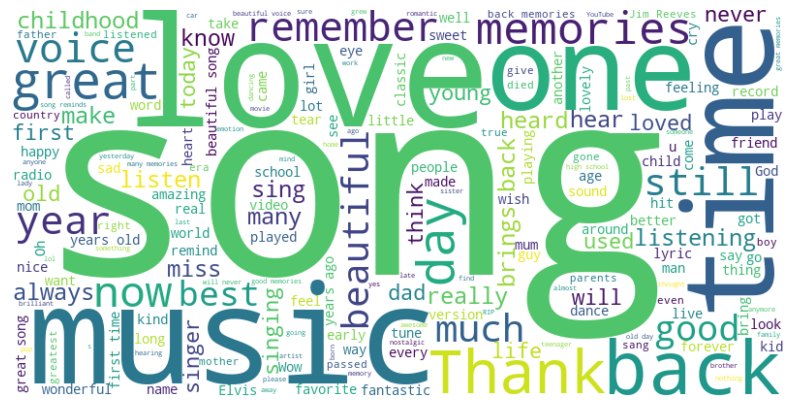

In [151]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud
text = " ".join(review for review in X.comment.dropna())
wordcloud = WordCloud(width=800,height=400,background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


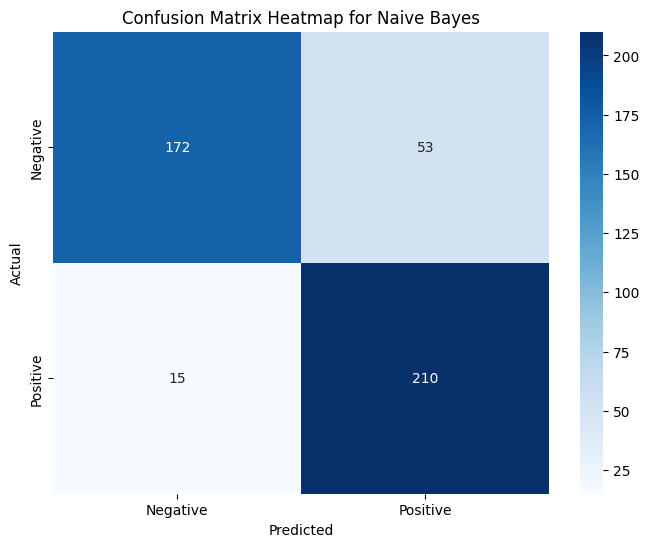

In [156]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the vectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(X['comment'])
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix.toarray(), X['sentiment_label'], test_size=0.3, random_state=42)

# Train the Multinomial Naive Bayes model
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)

# Make predictions
y_pred = NB_model.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap for Naive Bayes')

# Show the plot
plt.show()



##### >>> Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .


In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the vectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(X['comment'])


vectorizer.get_feature_names_out()


array(['00', '000', '045', ..., 'yup', 'zealand', 'zulus'], dtype=object)

##### >>> Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).

In [131]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix.toarray(), X['sentiment_label'], test_size=0.3, random_state=42)

# Naive Bayes for TF-IDF features
NBOne = MultinomialNB()
NBTwo = GaussianNB()
NBThree = BernoulliNB()

NBOne.fit(X_train, y_train)
y_pred = NBOne.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMultinomialNB Classification Report:\n", classification_report(y_test, y_pred,  digits=4))

NBTwo.fit(X_train, y_train)
y_pred = NBTwo.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nGaussianNB Classification Report:\n", classification_report(y_test, y_pred,  digits=4))

NBThree.fit(X_train, y_train)
y_pred = NBThree.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nBernoulliNB Classification Report:\n", classification_report(y_test, y_pred,  digits=4))


Accuracy: 0.8488888888888889

MultinomialNB Classification Report:
               precision    recall  f1-score   support

           0     0.9198    0.7644    0.8350       225
           1     0.7985    0.9333    0.8607       225

    accuracy                         0.8489       450
   macro avg     0.8591    0.8489    0.8478       450
weighted avg     0.8591    0.8489    0.8478       450

Accuracy: 0.6688888888888889

GaussianNB Classification Report:
               precision    recall  f1-score   support

           0     0.7436    0.5156    0.6089       225
           1     0.6293    0.8222    0.7129       225

    accuracy                         0.6689       450
   macro avg     0.6864    0.6689    0.6609       450
weighted avg     0.6864    0.6689    0.6609       450

Accuracy: 0.8733333333333333

BernoulliNB Classification Report:
               precision    recall  f1-score   support

           0     0.9078    0.8311    0.8677       225
           1     0.8443    0.9156    0

### Fourth Part

In [ ]:
# Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. 
# There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. 
# What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?


# I also think that there is some repeated sorting that we can optimize.
# Also, using fixed percentage threshold, like the top 5% of frequencies, which does not work well in all datasets i do think using TFIDF will make it more appropriate.
# Some basic text preprocessing steps are very important since they can help reduce noise and increase the quality of features, but its very hard to deal with it.


### Last Part



I'll try my best....